In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
# from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
fraud=pd.read_csv("C:\Games\Bhag Milkha Bhag 2013 Hindi MC DVDScr Xvid AC3 IcTv\Desktop\CSV\Fraud_check.csv")

In [3]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
fraud.shape

(600, 6)

In [5]:
Newfraud=fraud.rename({'Marital.Status': 'MaritalStatus','Taxable.Income':'TaxableIncome','City.Population':'CityPopulation','Work.Experience':'WorkExperience'}, axis=1)

In [6]:
Newfraud.head()

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [11]:
Newfraud=pd.get_dummies(Newfraud,columns=['Undergrad','MaritalStatus','Urban'])

In [12]:
Newfraud.head()

,TaxableIncome,CityPopulation,WorkExperience,Undergrad_0,Undergrad_1,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0


In [14]:
Newfraud["income"]="<=30000"
Newfraud.loc[Newfraud["TaxableIncome"]>=30000,"income"]="Good"
Newfraud.loc[Newfraud["TaxableIncome"]<=30000,"income"]="Risky"


In [15]:
Newfraud.head()

,TaxableIncome,CityPopulation,WorkExperience,Undergrad_0,Undergrad_1,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Urban_NO,Urban_YES,income
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good


In [16]:
Newfraud

,TaxableIncome,CityPopulation,WorkExperience,Undergrad_0,Undergrad_1,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Urban_NO,Urban_YES,income
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1,Good
596,69967,55369,2,0,1,1,0,0,0,1,Good
597,47334,154058,0,1,0,1,0,0,0,1,Good
598,98592,180083,17,0,1,0,1,0,1,0,Good


In [18]:
Newfraud.head(15)

,TaxableIncome,CityPopulation,WorkExperience,Undergrad_0,Undergrad_1,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Urban_NO,Urban_YES,income
0,68833,50047,10,1,0,0,0,1,0,1,Good
1,33700,134075,18,0,1,1,0,0,0,1,Good
2,36925,160205,30,1,0,0,1,0,0,1,Good
3,50190,193264,15,0,1,0,0,1,0,1,Good
4,81002,27533,28,1,0,0,1,0,1,0,Good
5,33329,116382,0,1,0,1,0,0,1,0,Good
6,83357,80890,8,1,0,1,0,0,0,1,Good
7,62774,131253,3,0,1,0,0,1,0,1,Good
8,83519,102481,12,1,0,0,0,1,0,1,Good
9,98152,155482,4,0,1,1,0,0,0,1,Good


In [21]:
Newfraud.shape

(600, 11)

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
labelencoder = LabelEncoder()

In [24]:
Newfraud.iloc[:,10] = labelencoder.fit_transform(Newfraud.iloc[:,10])

In [25]:
Newfraud.head()

,TaxableIncome,CityPopulation,WorkExperience,Undergrad_0,Undergrad_1,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Urban_NO,Urban_YES,income
0,68833,50047,10,1,0,0,0,1,0,1,0
1,33700,134075,18,0,1,1,0,0,0,1,0
2,36925,160205,30,1,0,0,1,0,0,1,0
3,50190,193264,15,0,1,0,0,1,0,1,0
4,81002,27533,28,1,0,0,1,0,1,0,0


In [26]:
x=Newfraud.iloc[:,1:10]

In [27]:
x

,CityPopulation,WorkExperience,Undergrad_0,Undergrad_1,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Urban_NO,Urban_YES
0,50047,10,1,0,0,0,1,0,1
1,134075,18,0,1,1,0,0,0,1
2,160205,30,1,0,0,1,0,0,1
3,193264,15,0,1,0,0,1,0,1
4,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,39492,7,0,1,1,0,0,0,1
596,55369,2,0,1,1,0,0,0,1
597,154058,0,1,0,1,0,0,0,1
598,180083,17,0,1,0,1,0,1,0


In [28]:
y=Newfraud.iloc[:,10]

In [29]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: income, Length: 600, dtype: int32

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=40)


In [31]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

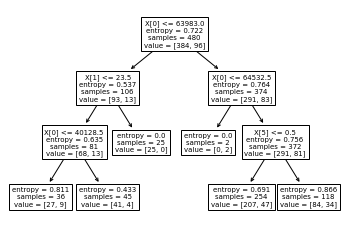

In [32]:
tree.plot_tree(model);

In [33]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    120
dtype: int64

In [34]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [35]:
pd.crosstab(y_test,preds)

col_0,0
income,
0,92
1,28


In [36]:
# Accuracy 
np.mean(preds==y_test)

0.7666666666666667

In [37]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [38]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [39]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7666666666666667

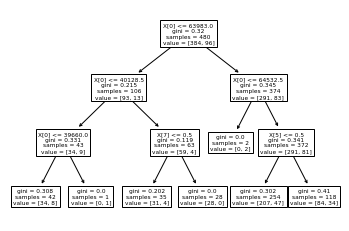

In [40]:
tree.plot_tree(model_gini);